<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹 애플리케이션

static구문을 사용하기 위해서는 load static구문을 사용해주어야 한다.


In [ ]:
# static안에 js디렉토리생성, magicgrid.js 생성
# https://github.com/e-oj/Magic-Grid 에서 Magic-Grid/dist/magic-grid.cjs.js 파일내용을 copy해서 넣어준 후
module.exports = MagicGrid;  # 마지막에 있는 모듈은 장고에서는 쓰지 않기 때문에 지워준다. 다른 웹프레임워크에서 사용해주는 것.,

# https://jsfiddle.net/eolaojo/4pov0rdf/의 JavaScript + No-Library (pure JS)코드를 copy해서 밑에 추가해준다.
let magicGrid = new MagicGrid({
  container: '.container',
  animate: true,
  gutter: 30,
  static: true,
  useMin: true
});

magicGrid.listen();

In [ ]:
# gsweb\articleapp\templates\articleapp\list.html
{% extends 'base.html' %}
{% load static %}
{% block content %}

    <script src="{% static 'js/magicgrid.js' %}">
    </script>

lorem picsum : 로렘입섬을 오마주한 웹서비스 임의의 이미지를 갖다줌


In [ ]:
# gsweb\articleapp\templates\articleapp\list.html
{% extends 'base.html' %}
{% load static %}
{% block content %}

    <style>
        .container div {
          width: 280px;
          background-color: lightseagreen;
          display: flex;
          justify-content: center;
          align-items: center;
          border-radius: 1rem;
        }
    .container img{
        width: 100%;
        border-radius: 1rem;
    }
    </style>


    <!DOCTYPE html>
<div class="container my-4">
  <div class="item1"><img src="https://picsum.photos/200/300" alt=""></div>   # 로렘픽섬의 주소를 불러온다. 맨 마지막 숫자는 높이
  <div class="item2"><img src="https://picsum.photos/200/333" alt=""></div>
  <div class="item3"><img src="https://picsum.photos/200/500" alt=""></div>
  <div class="item4"><img src="https://picsum.photos/200/100" alt=""></div>
  <div class="item5"><img src="https://picsum.photos/200/300" alt=""></div>
  <div class="item6"><img src="https://picsum.photos/200/200" alt=""></div>
  <div class="item7"><img src="https://picsum.photos/200/300" alt=""></div>
  <div class="item8"><img src="https://picsum.photos/200/400" alt=""></div>
  <div class="item9"><img src="https://picsum.photos/200/300" alt=""></div>
  <div class="item10"><img src="https://picsum.photos/200/700" alt=""></div>
  <div class="item11"><img src="https://picsum.photos/200/200" alt=""></div>
  <div class="item12"><img src="https://picsum.photos/200/600" alt=""></div>
  <div class="item13"><img src="https://picsum.photos/200/200" alt=""></div>
</div>

    <script src="{% static 'js/magicgrid.js' %}">
    </script>
{% endblock %}

In [ ]:
# gsweb\static\js\magicgrid.js
var masonrys = document.getElementsByTagName("img") # document = list.html
for (let i=0; i < masonrys.length; i++){
  masonrys[i].addEventListener('load', function (){
    magicGrid.positionItems();
  }, false)
}
# EventListener 이벤트가 일어나는 걸 감시하는, 어떤 이벤트가 일어났을 때 어떤 function을 실행하겠다라고 적음 (magicGrid.positionitems)
# => 로드 이벤트가 일어날 때 위치를 재조정한다!

In [ ]:
# gsweb\articleapp\models.py
class Article(models.Model):
    writer = models.ForeignKey(User, on_delete=models.SET_NULL,
                               related_name='article',
                               null=True)
    title = models.CharField(max_length=200, null=True)
    image = models.ImageField(upload_to='article/', null=True)
    content = models.TextField(null=True)

    created_at = models.DateField(auto_now_add=True, null=True)

model을 만들었기 때문에  
python manage.py makemigrations
python manage.py migrate


In [ ]:
# articleapp/forms.py
from django.forms import ModelForm

from articleapp.models import Article


class ArticleCreationForm(ModelForm):
    class Meta:
        model = Article
        fields = ['title', 'image', 'content']

# 2. 알고리즘

In [ ]:
# 큐를 원형큐로 풀이
# [..., 1,2,3,4, ...]
class Queue:
    def __init__(self, length):
        self.array = [None for _ in range(length+1)]
        self.f_idx = 0
        self.b_idx = 0
    
    def push(self, num):
        if self.is_full():
            return -1
        
        self.array[self.b_idx] = num
        self.b_idx = (self.b_idx + 1) % len(self.array)

    def pop(self):
        if self.is_empty():
            return -1

        self.f_idx = (self.f_idx + 1) % len(self.array)
        last_val = self.array[self.f_idx-1]
        self.array[self.f_idx-1] = None
        return last_val

    def size(self):
        return (self.b_idx + len(self.array) - self.f_idx) % len(self.array)

    def empty(self):
        return int(self.is_empty())

    def front(self):
        if self.is_empty():
            return -1

        return self.array[self.f_idx]

    def back(self):
        if self.is_empty():
            return -1

        return self.array[self.b_idx-1]

    def is_empty(self):
        return self.size() == 0

    def is_full(self):
        # return self.size() == len(self.array)
        return (self.b_idx + 1) % len(self.array) == self.f_idx

def run_cmd_with_queue(command, queue_obj):
    cmd_type = command[0]

    if cmd_type == "push":
        _, num = command
        res = queue_obj.push(int(num))
        
        if res:
            print(res)
    elif cmd_type == "pop":
        print(queue_obj.pop())
    elif cmd_type == "size":
        print(queue_obj.size())
    elif cmd_type == "empty":
        print(queue_obj.empty())
    elif cmd_type == "front":
        print(queue_obj.front())
    elif cmd_type == "back":
        print(queue_obj.back())

n = int(input())
queue_obj = Queue(4)

for _ in range(n):
    run_cmd_with_queue(input().split(), queue_obj)
    print(f"f_idx: {queue_obj.f_idx}")
    print(f"b_idx: {queue_obj.b_idx}")
    print(f"size: {queue_obj.size()}")
    print(queue_obj.array)

큐 추가 문제(카드2, 회전하는 큐)

In [ ]:
# 1
N = int(input())
N_list = [i+1 for i in range(N)]
while len(N_list)>0:
  first = N_list[0]
  N_list.pop(0)
  if len(N_list)==0:
    print(first)
  else:
    two = N_list[0]
    N_list.pop(0)
    N_list.append(two)

4
4


In [ ]:
# 다른 분이 푸신거!
n = int(input())
a = [i for i in range(1,n+1)]
while len(a) > 1:
  a = a[2:] + a[1:2]
print(a)

2
[2]


In [ ]:
# 2
import collections
N, M = list(map(int,input().split()))
N_list = [i+1 for i in range(N)]
queue = collections.deque(N_list)

p_list = list(map(int,input().split()))
cnt=0
while len(queue) != (N-M):
  first = queue[0]
  if first == p_list[0]:
    queue.popleft()
    p_list.pop(0)
  else:
    if queue.index(p_list[0])>len(queue)//2:
      last = queue[-1]
      queue.pop()
      queue.appendleft(last)
    else:
      queue.popleft()
      queue.append(first)
    cnt+=1
print(cnt)

32 6
27 16 30 11 6 23
59


In [ ]:
# 2 - rotate
import collections
N, M = list(map(int,input().split()))
N_list = [i+1 for i in range(N)]
queue = collections.deque(N_list)

p_list = list(map(int,input().split()))
cnt=0
while len(queue) != (N-M):
  first = queue[0]
  if first == p_list[0]:
    queue.popleft()
    p_list.pop(0)
  else:
    if queue.index(p_list[0])>len(queue)//2:
      queue.rotate(1)
    else:
      queue.rotate(-1)
    cnt+=1
print(cnt)

10 10
1 6 3 2 7 9 8 4 10 5
14


# 3. 딥러닝

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import csv

In [ ]:
# kaggle에 있는 데이터
df = pd.read_csv('/content/pulsar_stars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [ ]:
set(df['target_class'])

{0, 1}

In [ ]:
with open('/content/pulsar_stars.csv') as csvfile:
  csvreader = csv.reader(csvfile)
  next(csvreader)
  rows = []
  
  for row in csvreader:
    rows.append(row)

data = np.asarray(rows, dtype = 'float32')
input_cnt, output_cnt = 8,1

In [ ]:
data[:][0]

array([140.5625    ,  55.68378   ,  -0.23457141,  -0.6996484 ,
         3.1998327 ,  19.110426  ,   7.9755316 ,  74.242226  ,
         0.        ], dtype=float32)

In [ ]:
train_ratio = 0.8
mb_size = 32

test_begin_index = int(data.shape[0] * train_ratio)
print('test_begin_index : ', test_begin_index)

test_begin_index :  14318


In [ ]:
shuffle_map = np.arange(data.shape[0])
np.random.seed(1234)  # ?팀원들끼리 값을 맞춰줄때.. 

np.random.shuffle(shuffle_map)
print(shuffle_map[:5])

[ 9375  1570 15443 14077  6079]


In [ ]:
train_data = data[shuffle_map[:test_begin_index]]
test_data = data[shuffle_map[test_begin_index:]]

In [ ]:
train_x, train_y = train_data[:, :-output_cnt], train_data[:, -output_cnt:]
test_x, test_y = test_data[:, :-output_cnt], test_data[:, -output_cnt:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(14318, 8)
(14318, 1)
(3580, 8)
(3580, 1)


In [ ]:
pulsar_DNN_drop_sigmoid = tf.keras.Sequential([
                                               tf.keras.layers.Dense(units=128, activation='relu', input_shape = (8,)),
                                               tf.keras.layers.Dense(units=64, activation='relu'),
                                               tf.keras.layers.Dropout(rate = 0.5),
                                               tf.keras.layers.Dense(units=32, activation='relu'),
                                               tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
pulsar_DNN_drop_sigmoid.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pulsar_DNN_drop_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                loss = 'binary_crossentropy',
                                metrics = ['accuracy'])

In [ ]:
history = pulsar_DNN_drop_sigmoid.fit(train_x, train_y,
                                      batch_size = 32,
                                      epochs = 50,
                                      validation_split = 0.2,
                                      callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/50
358/358 [==============================] - 1s 2ms/step - loss: 0.2462 - accuracy: 0.9474 - val_loss: 0.1119 - val_accuracy: 0.9654
Epoch 2/50
358/358 [==============================] - 1s 2ms/step - loss: 0.1358 - accuracy: 0.9622 - val_loss: 0.0781 - val_accuracy: 0.9784
Epoch 3/50
358/358 [==============================] - 1s 2ms/step - loss: 0.1220 - accuracy: 0.9675 - val_loss: 0.0814 - val_accuracy: 0.9794
Epoch 4/50
358/358 [==============================] - 1s 2ms/step - loss: 0.1170 - accuracy: 0.9674 - val_loss: 0.0866 - val_accuracy: 0.9804
Epoch 5/50
358/358 [==============================] - 1s 2ms/step - loss: 0.1090 - accuracy: 0.9694 - val_loss: 0.0731 - val_accuracy: 0.9801
Epoch 6/50
358/358 [==============================] - 1s 2ms/step - loss: 0.1081 - accuracy: 0.9716 - val_loss: 0.1052 - val_accuracy: 0.9804
Epoch 7/50
358/358 [==============================] - 1s 2ms/step - loss: 0.1060 - accuracy: 0.9721 - val_loss: 0.0967 - val_accuracy: 0.9794
Epoch 

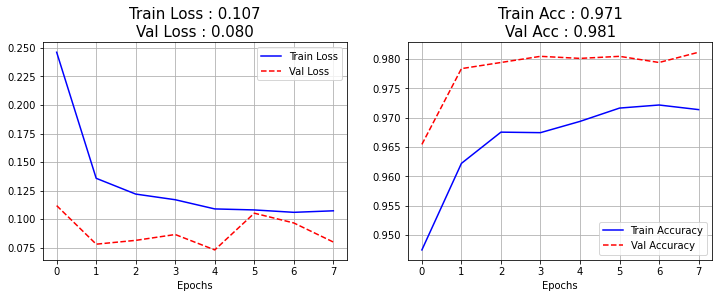

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss     = history.history['loss']

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val Loss')
plt.xlabel('Epochs')
plt.title("Train Loss : {:.3f}\nVal Loss : {:.3f}".\
          format(loss[-1], val_loss[-1]), fontsize = 15)

plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.title("Train Acc : {:.3f}\nVal Acc : {:.3f}".\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.grid()
plt.legend()

plt.show()


In [ ]:
pred_Y = pulsar_DNN_drop_sigmoid.predict(test_x)
pred_Y_3 = np.round(pred_Y,3)
#print(pred_Y_3[:20])

pred_Y = np.round(pred_Y)
print(pred_Y[:20])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
print(pd.DataFrame(pred_Y).value_counts())

print(pd.DataFrame(test_y).value_counts())

0.0    3302
1.0     278
dtype: int64
0.0    3258
1.0     322
dtype: int64


In [ ]:
# 주요 함수 
# np.greater(x1, x2)
# : 첫 번째 매개변수가 두 번째 매개변수 보다 크면 True를 반환합니다. 

# np.logical_and(x1, x2)
# : 첫 번째 매개변수와 두 번째 매개변수 모두 참(True)일시 True를 반환함 

# np.logical_not(x1)
# : 매개변수의 결과를 반대로 반환합니다.(True -> False)

In [ ]:
# 예측값(est)이 참(yes 1)이냐?
# Y-Predict positive

est_yes = np.greater(pred_Y, 0.5)
print("est_yes[:5] : \n", est_yes[:5])

# 실제값(ans)이 참(yes)이냐?
# Y-label positive

ans_yes = np.greater(test_y, 0.5)
print("ans_yes[:5] : \n", ans_yes[:5])

est_yes[:5] : 
 [[False]
 [False]
 [False]
 [False]
 [False]]
ans_yes[:5] : 
 [[False]
 [False]
 [False]
 [False]
 [False]]


In [ ]:
# 예측(est)값이 거짓(no) 이냐? 
est_no = np.logical_not(est_yes)
print("est_no : \n", est_no[:5])

# 실제(ans)값이 거짓(no) 이냐? 
ans_no = np.logical_not(ans_yes)
print("ans_no : \n", ans_no[:5])

est_no : 
 [[ True]
 [ True]
 [ True]
 [ True]
 [ True]]
ans_no : 
 [[ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [ ]:
tp = np.sum(np.logical_and(est_yes, ans_yes))
print('TP : ',tp)
tn = np.sum(np.logical_and(est_no, ans_no))
print('TN : ',tn)

fp = np.sum(np.logical_and(ans_no, est_yes))
print('FP : ',fp)
fn = np.sum(np.logical_and(ans_yes,est_no))
print('FN : ',fn)

TP :  257
TN :  3237
FP :  21
FN :  65


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


print(pred_Y[:, 0])
print(test_y[:, 0])

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print("confusion_matrix : \n", confusion_matrix(test_y[:, 0], pred_Y[:, 0]))
print("precision_score : \n", precision_score(test_y[:, 0], pred_Y[:, 0]))
print("recall_score : \n", recall_score(test_y[:, 0], pred_Y[:, 0]))

print("precision_score : \n", precision_score(test_y[:, 0], pred_Y[:, 0]))
print("recall_score : \n", recall_score(test_y[:, 0], pred_Y[:, 0]))

confusion_matrix : 
 [[3237   21]
 [  65  257]]
precision_score : 
 0.9244604316546763
recall_score : 
 0.7981366459627329
precision_score : 
 0.9244604316546763
recall_score : 
 0.7981366459627329


In [ ]:
precision = safe_div(tp , (tp + fp))
print("precision : ", precision)

recall = safe_div(tp, (tp + fn))
print("recall : ", recall)

accuracy = safe_div((tp + tn), (tp + tn + fp + fn))
print("accuracy :", accuracy)

f1 = 2 * (precision * recall), (precision + recall)
print('F1-score : ', f1)

precision :  0.9244604316546763
recall :  0.7981366459627329
accuracy : 0.975977653631285
F1-score :  (1.4756914964922472, 1.7225970776174093)


In [ ]:
def safe_div(p,q):
    p, q = float(p), float(q)

    if np.abs(q) < 1.0e-20:
        return np.sign(p)

    return p / q

In [ ]:
np.sign(-123123123)

-1

# 4. 머신러닝

In [ ]:
!pip install mglearn

#### SVM 실습 01

유방암 데이터 셋에 SVM 적용

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
# 데이터 로드
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 학습
model = SVC(C=10000, ).fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(0.971830985915493, 0.972027972027972)

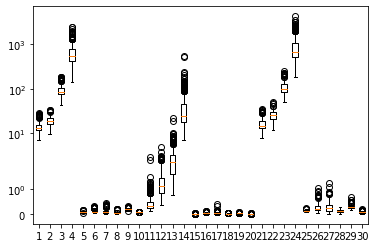

In [ ]:
# 유방암 데이터 세트의 특성 값 범위 시각화 (y 축은 로그 스케일)
plt.boxplot(X_train)
plt.yscale('symlog')
plt.show()

- 유방암 데이터셋의 특성은 자릿수 자체가 완전히 다름

- 일부 모델(선형 모델 등)에서도 어느 정도 문제가 될 수 있지만, 커널 SVM에서는 영향이 아주 큼

##### SVM을 위한 전처리

- 특성 값의 범위가 비슷해지도록 조정하는 것

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.min(axis=0)
X_train_scaled.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

##### 스케일링된 데이터를 SVC에 적용하기




In [ ]:
# gamma 파라미저 조정
model = SVC(C=100, gamma=0.02 ).fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test)

(0.9835680751173709, 0.972027972027972)

In [ ]:
# C 파라미터 조정
model = SVC(C=1000, gamma=0.01).fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test)

(0.9859154929577465, 0.9790209790209791)

## 장단점

- SVM은 강력한 모델이며 다양한 데이터셋에서 잘 작동

- SVM은 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있음

- 저차원과 고차원의 데이터(즉 특성이 적을 때와 많을 때)에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않음

- 10,000개의 샘플 정도면 SVM 모델이 잘 작동하겠지만 100,000개 이상의 데이터셋에서는 속도와 메모리 관점에서 도전적인 과제

- SVM의 또 하나의 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써야 한다는 점

- 그런 이유로 대부분 랜덤 포레스트나 그래디언트 부스팅 같은 (전처리가 거의 또는 전혀 필요 없는) 트리 기반 모델을 애플리케이션에 많이 사용

- SVM 모델은 분석하기도 어렵고 예측이 어떻게 결정되었는지 이해하기 어렵고 비전문가에게 모델을 설명하기가 난해함

- 하지만 모든 특성이 비슷한 단위이고(예를 들면 모든 값이 픽셀의 컬러 강도) 스케일이 비슷하면 SVM을 시도해볼 만함

- 커널 SVM에서 중요한 매개변수는 C와 gamma이며 모두 모델의 복잡도를 조정하며 둘 다 큰 값이 더 복잡한 모델을 만듬

- 연관성이 많은 이 두 매개변수를 잘 설정하려면 C와 gamma를 함께 조정

## Decision Tree

- 결정 트리(decision tree)는 분류와 회귀 문제에 널리 사용하는 모델 <br>
(분류와 회귀에 모두 사용)

- 분할(Split)와 가지치기 (Pruning) 과정을 통해 생성 <br>
(Tree를 만들기 위해 예/아니오 질문을 반복하며 학습)

- 다양한 앙상블(ensemble) 모델이 존재한다 <br>
     (RandomForest, GradientBoosting, XGBoost)

참고

[트리(Tree)의 개념과 특징을 이해 - 블로그](https://gmlwjd9405.github.io/2018/08/12/data-structure-tree.html)

[트리(그래프) - 나무위키](https://namu.wiki/w/%ED%8A%B8%EB%A6%AC(%EA%B7%B8%EB%9E%98%ED%94%84))

[이진 트리 - 위키백과](https://ko.wikipedia.org/wiki/%EC%9D%B4%EC%A7%84_%ED%8A%B8%EB%A6%AC)

#### 트리(tree) 자료구조

- 노드로 이루어진 자료 구조

- 계층 모델

- 그래프의 한 종류
  - '최소 연결 트리' 라고도 불림
  - 사이클(cycle)이 없는 하나의 연결 그래프(Connected Graph)
  - 또는 DAG(Directed Acyclic Graph, 방향성이 있는 비순환 그래프)의 한 종류

- 예) 파일디렉토리

트리(tree) 자료구조에서의 용어

<center>
 <img src="https://gmlwjd9405.github.io/images/data-structure-tree/tree-terms.png" alt="트리(Tree)용어" width="60%" />

</center>

- 노드(node) : 트리는 노드들의 집합으로 트리를 구성, 보통 (value) 값과 부모 자식의 정보를 가진다.
- 루트 노드(root node): 부모가 없는 노드, 트리는 하나의 루트 노드만을 가진다.
- 단말 노드(leaf node): 자식이 없는 노드, '리프',‘말단 노드’ 또는 ‘잎 노드’라고도 부른다.
- 내부(internal) 노드: 단말 노드가 아닌 노드
- 간선(edge): 노드를 연결하는 선 ('엣지', link, branch 라고도 부름)
- 형제(sibling): 같은 부모를 가지는 노드
- 노드의 크기(size): 자신을 포함한 모든 자손 노드의 개수
- 노드의 깊이(depth): 루트에서 어떤 노드에 도달하기 위해 거쳐야 하는 간선의 수
- 노드의 레벨(level): 트리의 특정 깊이를 가지는 노드의 집합
- 노드의 차수(degree): 하위 트리 개수 / 간선 수 (degree) = 각 노드가 지닌 가지의 수
- 트리의 차수(degree of tree): 트리의 최대 차수
- 트리의 높이(height): 루트 노드에서 가장 깊숙히 있는 노드의 깊이

#### 결정 트리(decision tree)

- 의사결정트리는 학습 데이터로부터 조건식을 만들고 예측할 때는 트리의 루트 노드(root node) 부터 순서대로 조건 분기를 타면서 리프 노드(leaf node)에 도달하면 예측 결과를 내는 알고리즘

- 학습 결과로 IF-THEN 형태의 규칙을 생성 (Split)

- 타깃 값이 한 개인 리프 노드를 순수 노드라고 한다. 

- 모든 노드가 순수 노드가 될 때 까지 학습하면 모델이 복잡해지고 훈련 데이터에 과대적합이 된다.

- 새로운 데이터 포인트가 들어오면 해당하는 노드를 찾고, 분류라면 더 많은 클래스를 선택, 회귀라면 평균을 구한다.


특징

- 학습한 모델을 사람이 해석하기 쉽다 -> 시각화 가능
- 입력 데이터에 대한 정규화가 필요 없다
- 범주형 변수나 데이터의 누락값이 있어도 용인된다
- 특정 조건이 맞으면 과적합을 일으키는 경향이 있다
 - 트리가 깊어질 수록 데이터 수가 적어짐
 - 가지치기(pruning)로 깊이를 줄여서 방지
- 비선형 문제에는 우수하지만 선형 분리 문제는 잘 풀지 못한다
- 데이터 분포가 특정 클래스에 쏠려 있으면 잘 풀지 못한다
- 데이터의 작은 변화에도 결과가 크게 바뀌기 쉽다
- 예측 성능은 보통이다
- 배치 학습만 학습할 수 있다.


종류

- 의사 결정 포레스트, 향상된 의사결정 트리, Random Forest, Rotation Forest 등


결정트리(Decision Tree) 과대적합 제어

- 노드 생성을 미리 중단하는 사전가지치기(pre-pruning)와 트리를 만든후에 크기가 작은 노드를 삭제하는 사후가지치기(pruning)가 있다. <br>
    (sklearn은 사전가지치기만 지원)

가지치기(pruning)
- 하나의 가지 (branch)에 동일한 예측 값이 나오는 경우
 - 의사결정트리는 동일 조건에서 가장 간단한 구조여야 한다.

사전가지치기(pre-pruning)

- 트리의 최대 깊이나 리프노드의 최대 개수를 제어

- 노드가 분할하기 위한 데이터 포인트의 최소 개수를 지정


장단점

- 만들어진 모델을 쉽게 시각화할 수 있어 이해하기 쉽다. <br>
    (white box model)

- 각 특성이 개별 처리되기 때문에 데이터 스케일에 영향을 받지 않아 특성의 정규화나 표준화가 필요 없다.

- 훈련데이터 범위 밖의 포인트는 예측 할 수 없다. <br>
    (ex : 시계열 데이터)

- 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않다.


[DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

```
DecisionTreeClassifier(criterion, splitter, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, random_state, max_leaf_nodes, min_impurity_decrease, min_impurity_split, class_weight, presort)
```
- criterion : 분할 품질을 측정하는 기능 (default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- <font  color=yellow> max_depth : 트리의 최대 깊이 <br>
(값이 클수록 모델의 복잡도가 올라간다.) </font>
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- <font  color=yellow> min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1) </font>
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- <font  color=yellow> max_leaf_nodes : 리프 노드의 최대수 </font>
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- class_weight : 클래스 가중치
- presort : 데이터 정렬 필요 여부


In [ ]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

#### Decision Tree 실습 01

붓꽃 데이터 결정트리 만들기

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=11)

# 모델 학습
model = DecisionTreeClassifier().fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test,y_test)

(1.0, 0.9333333333333333)

**Graphviz 설치(Windows)**
코랩에선 설치 안해도 된다.
1. 아래 링크로 들어가서 graphviz-2.38-win32.msi 다운로드 후 설치

> https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/

2. 시스템 환경변수 PATH 에 다음 경로 추가

> C:\Program Files (x86)\Graphviz2.38\bin

```
# 파이썬 래퍼(Wrapper) 모듈을 별도로 설치
# !pip install graphviz
```

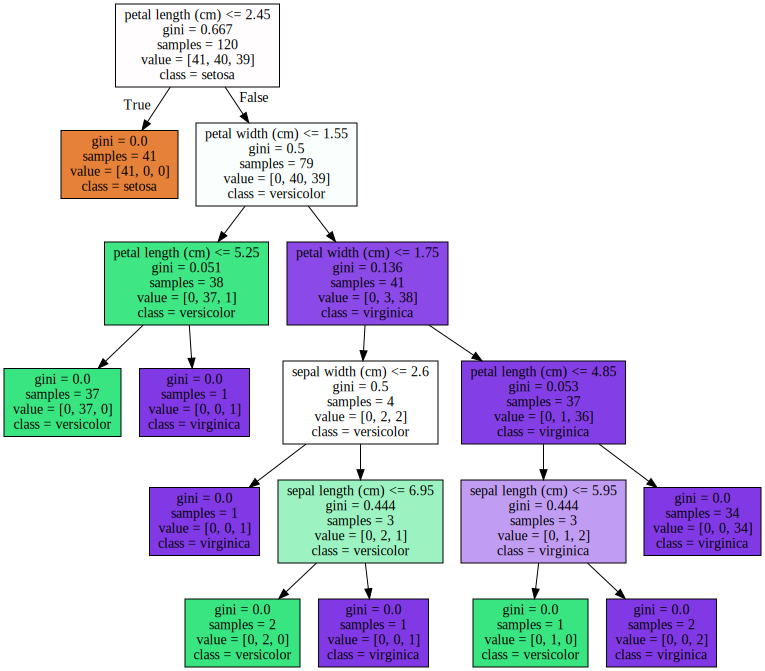

In [ ]:
# 결정트리 규칙을 시각화
from sklearn.tree import export_graphviz
import graphviz

# export_graphviz() 를 호출하여 out_file 파라메터의 "tree.dot" 파일을 생성
export_graphviz(model, out_file='tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True)

# "tree.dot" 파일을 graphviz 가 읽어서 주피터 노트북에 시각화
with open('tree.dot')as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

- 각 규칙에 따라 트리의 브랜치(branch) 노드와 말단 리프(leaf) 노드가 어떻게 구성되는지 시각화

- 트리를 조사할 때 많은 수의 데이터가 흐르는 경로를 찾는 것이 중요

트리 시각화 장점
- 알고리즘의 예측이 어떻게 이뤄지는지 이해가 가능
- 비전문가에게 머신러닝 알고리즘을 설명하기에 좋음

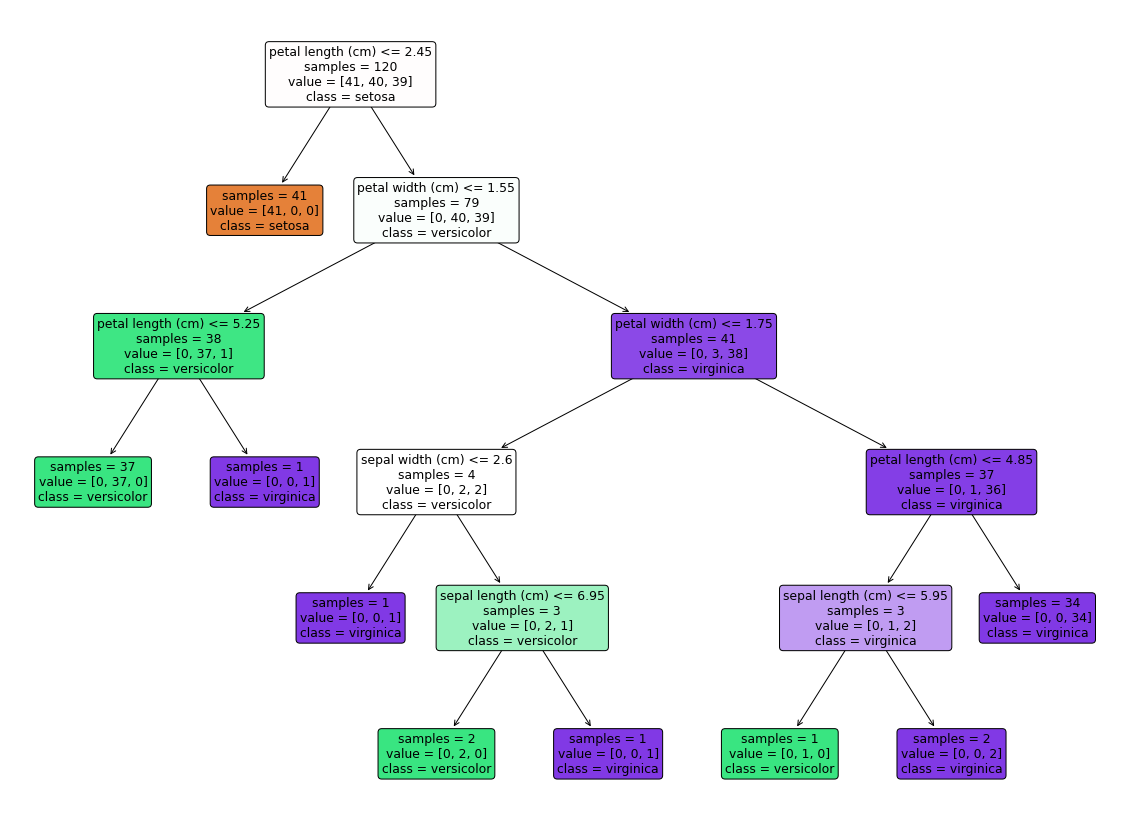

In [ ]:
# 사이킷런 0.21 버전 이후 맷플롯립 기반 트리 그래프 시각화 함수 추가
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure( figsize=(20,15))
tree.plot_tree(model,
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True, impurity=False,
               rounded=True)
plt.show()

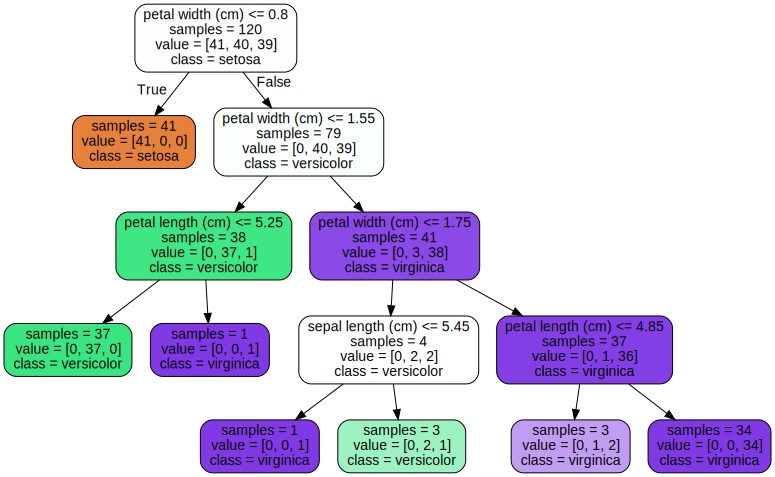

In [ ]:
# min_samples_split
# 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
# 모델학습
model = DecisionTreeClassifier(min_samples_split=4).fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

# 결정트리 규칙 시각화
export_graphviz(model, out_file='tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True, rounded=True, impurity=False)

# "tree.dot" 파일을 graphviz 가 읽어서 주피터 노트북에 시각화
with open('tree.dot') as f:
  dot_graph = f.read()

display( graphviz.Source(dot_graph) )

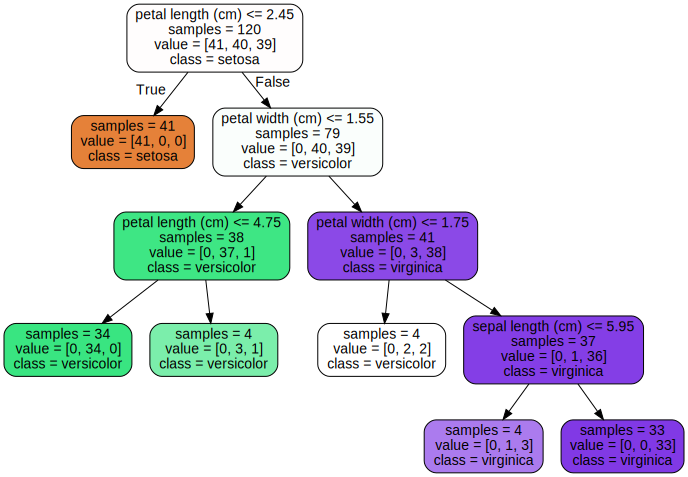

In [ ]:
# min_samples_leaf
# 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값
# 모델학습
model = DecisionTreeClassifier(min_samples_leaf=4).fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

# 결정트리 규칙 시각화
export_graphviz(model, out_file='tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                filled=True, rounded=True, impurity=False)

# "tree.dot" 파일을 graphviz 가 읽어서 주피터 노트북에 시각화
with open('tree.dot') as f:
  dot_graph = f.read()

display( graphviz.Source(dot_graph) )

##### 트리 특성 중요도

- 특성 중요도(feature importance) : 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가

- 이 값은 0과 1 사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻
- 특성 중요도의 전체 합은 1

feature_importances_

- 중요한 몇 개의 특성(feature)이 명확한 트리를 만드는 데 크게 기여 </br>
(모델을 좀 더 간결하고 이상치(Outlier)에 강한 모델을 만들 수 있기 때문)
- 결정트리가 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 feature_importances_ 로 제공

트리 특성 중요도: [0.006 0.    0.546 0.448]


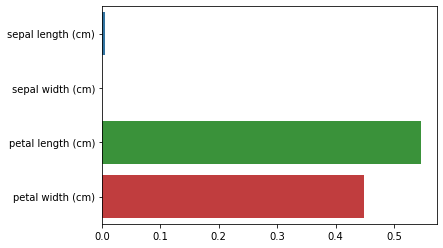

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print('트리 특성 중요도:', np.round(model.feature_importances_, 3) )

# feature별 importance 매핑
# feature importance를 column 별로 시각화 하기 
sns.barplot(x=model.feature_importances_, y=iris.feature_names)
plt.show()